# Airbnb price category prediction


---


Given a Airbnb price category Dataset

# In this Notebook, I have 7 Trails :

# - Trial 1 

  - Image as ( Input Feature ) .
  - Price as Output ( Beginner , Plus , Premium ) .
  - Using HyberBand to Tunning the Parameters .
  - Using Conv2d Layer .
  - Using Dropout Layer .
  
---  
  
# - Trial 2

  - Summary as feature ( Input ) .
  - Price as Output ( Beginner , Plus , Premium ) .
  - Different Preprocessing on Text .
  - Using LSTM Layer .
  - Dropout Layer .
  
---  
  
# - Trial 3 

  - Summary as feature ( Input ) .
  - Price as Output ( Beginner , Plus , Premium ) .
  - Different Preprocessing on Text .
  - Using GRU Layer .
  - Dropout Layer .


---

# - Trial 4 

  - Summary as feature ( Input ) .
  - Price as Output ( Beginner , Plus , Premium ) .
  - Different Preprocessing on Text .
  - Using GRU Layer .
  - Dropout Layer .
  - Translation Methods on Text .
  - Using Bidirectional layer.
  
---

# - Trial 5,6

  - Multi-objective and Multi-modality Input ( Summary and Image )  
  - Price as Output ( Beginner , Plus , Premium ) and Type .
  - Different Preprocessing on Text .
  - Translation Methods on Text .
  
------------------

# - Trial 7 

  - Multi-objective and Multi-modality Input ( Summary and Image ) and Output ( type , price )
  - Price as Output ( Beginner , Plus , Premium ) .
  - Different Preprocessing on Text .
  - Using LSTM Layer on Summary.
  - Dropout Layer .
  - Translation Methods on Text .
 
    

---

References:

[1] http://multicomp.cs.cmu.edu/multimodal-machine-learning/

[2] https://en.wikipedia.org/wiki/Multi-task_learning

[3] https://keras.io/api/keras_tuner/tuners/hyperband/

[4] https://medium.com/riskified-technology/xgboost-lightgbm-or-catboost-which-boosting-algorithm-should-i-use-e7fda7bb36bc

#**Problem Formulation:**

# **1 - What is the input?**

-> 7627 rows × 4 columns

The file Contains (4 Features) including ( Summary , Image , Type , Price )
The Input ( Summary , Image ) and Output ( Type , Price )
******************************************************
# **2 - What is the output?** 

-> Classify The Inputs Features to Y-Label ( Type ) and Y-Label ( Price ) Prediction ( 1 , 2 , 3 ) 
****************************************************** 

# **3 - What data mining function is required?**

-> clean our input data to get the desired knowledge

-> Data mining generally refers to examining a large amount of data to extract valuable information. The data mining process uses predictive models based on existing and historical data to project potential outcome for business activities and transactions.
*********************************************************
# **4 - What could be the challenges?** 

  1 - Replace Nan values with most frequent value and preprocessing step

  2 - Interact with Different languages ( France and English ) 
  
  3 - Use translation methods

  4 - Interact with Text and image data

  5 - Choosing the best Hyber-parameters for each model 
  
  6-  Challenges with CNN , LSTM , GRU
  
  7-  Using hyberBand as method to Tunning the Hyper-parameters 
*********************************************************
# **5 - What is the impact?**

 -> So ,  Classify The Inputs Features to Y-Label ( Type ) and Y-Label ( Price ) Prediction ( 1 , 2 , 3 ) 
**********************************************************
# **6 - What is an ideal solution?**

->  Experiment with Trial 5 and 6 ( Text + Image ) as Input and type and price as output, Multi-objective and Multi-modality using CNN into image , I got the Highest Accuracy  on kaggle 67 %

***********************************************************

In [3]:
!pip install tqdm
!pip install tqdm
!pip install ipywidgets widgetsnbextension pandas-profiling


In [5]:
!pip install bayesian-optimization
!pip install langdetect
!pip install deep-translator


^C


In [2]:
# Import  All Required Packages 
import os
import sys
from tensorflow import keras
from tensorflow.keras import regularizers
import pandas as pd
from tqdm.notebook import tqdm
from PIL import Image
import pandas as pd
import os
import numpy as np
from ast import literal_eval
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
from bayes_opt import BayesianOptimization
from tensorflow.keras.optimizers import Adam ,RMSprop ,Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.layers import LeakyReLU
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split
from time import time
from matplotlib import pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, GRU, Bidirectional
from langdetect import detect    
from collections import Counter
from deep_translator import GoogleTranslator
from keras.callbacks import EarlyStopping
from pprint import pprint

from __future__ import absolute_import, division, print_function, unicode_literals
import collections
import numpy as np
import tensorflow as tf
name = 'keras_tuner'
if name not in sys.modules:
  !pip install keras_tuner
  import keras_tuner as kt
else:
  import keras_tuner as kt

In [3]:
df = pd.read_csv('E:/Data_Mining/Competitions/a4/train_xy.csv') # Read Training File DataSet
df

summary               image  \
0     Spacious, sunny and cozy modern apartment in t...     img_train/0.jpg   
1     Located in one of the most vibrant and accessi...     img_train/1.jpg   
2     Logement coquet et douillet à 10 minutes du ce...     img_train/2.jpg   
3     Beautiful and spacious (1076 sc ft, / 100 mc) ...     img_train/3.jpg   
4     Très grand appartement ''rustique'' et très ag...     img_train/4.jpg   
...                                                 ...                 ...   
7622  Un grand logement 4 et 1/2, tout inclut, bien ...  img_train/7626.jpg   
7623  Magnificent condo directly on the river. You w...  img_train/7627.jpg   
7624  This apartment is perfect for anyone visiting ...  img_train/7628.jpg   
7625  It is a cozy ,clean ,and comfortable apartment...  img_train/7629.jpg   
7626  Modern country style (newly-renovated); open c...  img_train/7630.jpg   

           type  price  
0     Apartment      1  
1     Apartment      0  
2     Apartment      1  
3     Apartment      1  
4     Apartment      0  
...         ...    ...  
7622  Apartment      0  
7623  Apartment      2  
7624  Apartment      1  
7625  Apartment      0  
7626      House      1  

[7627 rows x 4 columns]

In [4]:
df.isnull().sum(axis = 0) # get the Number of Nans Values

summary    301
image        0
type         0
price        0
dtype: int64

In [5]:
df=df.apply(lambda x: x.fillna(x.value_counts().index[0]))# Fill Nans With the Most Common Value


In [6]:
df.isnull().sum(axis = 0) # Check that no nans Values in DataSet

summary    0
image      0
type       0
price      0
dtype: int64

Let's encode the prediction labels and calculate the total number 
of unique labels. After, lets split the dataset into training set and testing set.

In [7]:
df['type'] = df.type.astype('category').cat.codes # Label Encoder for Type 
len_type = len(df.type.unique()) # get length of uniqiue values of Type
len_price = len(df.price.unique())# get length of uniqiue values of Price


## Data Preprocessing

We have image and text data. 

- Image data: resize
- Text data: tokenization and converting to integer IDs

In [8]:
# preprocess image data
import os

def load_image(file):
    try:
        image = Image.open(
            file
        ).convert('LA').resize((64, 64))
        arr = np.array(image)
    except:
        arr = np.zeros((64, 64, 2))
    return arr


# loading images:
x_image = np.array([load_image(i) for i in tqdm("E:/Data_Mining/Competitions/a4/"+df.image)])

# loading overview: (force convert some of the non-string cell to string)
x_text = df.summary.astype('str')

# get type 
y_type = df.type

# get price
y_price = df.price


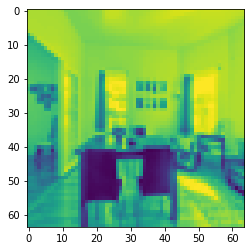

In [9]:
# check image loading
import matplotlib.pyplot as plt
plt.imshow(x_image[0, :, :, 0])

In [10]:
df_test = pd.read_csv('E:/Data_Mining/Competitions/a4/test_x.csv')# Read test file Dataset 
df_test

# loading images:
x_test_image = np.array([load_image(i) for i in tqdm("E:/Data_Mining/Competitions/a4/"+df_test.image)]) #laod test images

In [11]:
df_test.isnull().sum(axis = 0) # get the Number of Nans Values
df_test=df_test.apply(lambda x: x.fillna(x.value_counts().index[0]))# Fill Nans With the Most Common Value

# Trial 1 ( IMAGE )

- Work on Image as feature ( Input )
- 3 output (0 or 1 or 2) ( Price ) 
- Using HyberBand to tunning the Parameters
- Conv2d layer..
- Dropout layer to Prevent Overfitting.
- BatchNormalization layer. 
- HYPERBAND is a principled early-stoppping method that adaptively allocates a pre- defined resource, e.g., iterations, data samples or number of features, to randomly sampled configuration

In [14]:
keras.backend.clear_session()  #Clear the session to remove weights 
# Using train_test_split to split dataSet
X_tr, X_val, y_tr, y_val = train_test_split(x_image,y_price,stratify=y_price,test_size = 0.2,random_state=42) 
def create_ANN(hyperparameter):
  """
  function to create model that tuner will search for best hyperparameter within this model.
  build a neural network archeticture.
  """
  # Try Different HyperParameters with in range like ( learning_rate , hidden_units , hidden_dropout )  
  LR = hyperparameter.Float('learning_rate',min_value=1e-5,max_value=0.1,sampling='LOG',default=1e-3) # learning Rate
  hidden_neurons = hyperparameter.Int('hidden_units',min_value=32,max_value=512,step=32,default=128) # hidden_neurons
  hidden_dropout =  hyperparameter.Float('hidden_dropout',min_value=0.0,max_value=0.5,default=0.25,step=0.05) # dropout
  # 
  ANN = Sequential()
  ANN.add(InputLayer(input_shape=( 64, 64, 2))) # input shape
  # 1st conv block
  ANN.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='same'))  # using stride and padding 
  ANN.add(MaxPool2D(pool_size=(2, 2), padding='same')) 
  # 2nd conv block
  ANN.add(Conv2D(50, (5, 5), activation='relu', strides=(2, 2), padding='same'))# using stride and padding 
  ANN.add(MaxPool2D(pool_size=(2, 2), padding='same')) # reduce dimentionality
  ANN.add(BatchNormalization())
  # 3rd conv block 
  ANN.add(Conv2D(70, (3, 3), activation='relu', strides=(2, 2), padding='same'))# using stride and padding 
  ANN.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
  ANN.add(BatchNormalization())
  # ANN block
  ANN.add(Flatten())  
  ANN.add(Dense(units=hidden_neurons, activation='tanh'))#input + hidden layer,
  ANN.add(Dropout(rate = hidden_dropout))   # Dropout Layer
  ANN.add(Dense(3, activation='softmax'))   # Output Layer (0,1,2)
  optimizer = Adam(learning_rate=LR)
  ANN.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])   #multiclass
  ANN.build(X_tr.shape)
  print(ANN.summary())
  return ANN

In [15]:
tuner = kt.Hyperband(create_ANN,
                     objective='val_accuracy',
                     max_epochs=20,
                     directory='my_dir',
                     factor = 3,
                     project_name='salama',
                     overwrite = True) # Apply HyberBand Function

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 25)        1275      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 25)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 50)        31300     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 50)         0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 8, 8, 50)         200       
 ormalization)                                                   
                                                        

In [17]:
stop_early = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5) # Using EarlyStopping
start_time = time()

#search for best hyperparameters based on validation accuracy
tuner.search(X_tr, y_tr, epochs=250, validation_data=(X_val,y_val), use_multiprocessing=True, workers=6, callbacks=[stop_early])

# Get the optimal hyperparameters after finishing the search
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0] #get the number 1 best hyperparametes

print("\t\t\t\t\t\tThe best hyperparameters search is complete.\n")
print(f"The optimal number of units in the hidden layer is {best_hps.get('hidden_units')}, the best dropout in this layer is {best_hps.get('hidden_dropout')},).")
print(f"the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.")

end_time = time()
total_time = end_time - start_time
result = '{0:02.0f} minutes and {1:02.0f} seconds.'.format(*divmod((total_time/60) * 60, 60))

print(f"The total time taken to search for best hyperparameters was: {result}")

Trial 42 Complete [00h 04m 13s]
val_accuracy: 0.6231979131698608

Best val_accuracy So Far: 0.6277850866317749
Total elapsed time: 02h 33m 05s
INFO:tensorflow:Oracle triggered exit
						The best hyperparameters search is complete.

The optimal number of units in the hidden layer is 480, the best dropout in this layer is 0.05,).
the optimal learning rate for the optimizer is 8.891964230855875e-05.
The total time taken to search for best hyperparameters was: 34 minutes and 51 seconds.


## Conclusion For Trial 1

- I got The Accuracy is  70.49 % 
- Validation_Accuracy is 0.6277850866317749 %
- By Using Hyperband , We got the following Results -: 
- The optimal number of units in the hidden layer is : 480
- The best dropout in this layer is : 0.05
- The optimal learning rate for the optimizer is : 8.891964230855875e-05
- We got the Optimal values of HyperParameters Using HyberBand Function After 42 Trials , I got Accuracy (70.49 %) and Validation_Accuracy (0.627 %) 
- in ( Trial 1 ) there is no overFitting Appear
-----------------------------------------------------------------------

## Trial 2 ( TEXT Using LSTM )

- Work on only Text as feature ( Input )
- 3 output ( price ) 0 or 1 or 2 
- Different Preprocessing on Text Using Translation Methods
- Using LSTM layer..
- Dropout layer.
- The idea here using  Layers Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in the field of deep learning as it works well on Text .


In [96]:
df.summary=df.summary.astype(str) # Convert Summary to string not float (Traning file)

# Get Number of Different language like English and france ,etc

summaryTraining = df.summary.apply(lambda x: detect(x))

print("Statistical of languages for Training : ",Counter(summaryTraining)) # get count of each language Training


Statistical of languages for Training :  Counter({'en': 5566, 'fr': 2029, 'zh-cn': 10, 'es': 6, 'de': 5, 'ko': 2, 'af': 2, 'ro': 2, 'nl': 1, 'da': 1, 'it': 1, 'pt': 1, 'vi': 1})


In [109]:
'''
Using GoogleTranslator to translate each language to english to try to make all data in one language

'''
def Translation_Text(summary): 
  for i in range (len(summary)) :
      if(detect(summary[i])=="fr"):
         summary[i] = GoogleTranslator(source='french', target='english').translate(summary[i])  
  return summary

In [111]:
df.summary=Translation_Text(df.summary) # Apply Translation function to Training Data
df.summary

<ipython-input-109-f0c45148b93b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary[i] = GoogleTranslator(source='french', target='english').translate(summary[i])


0       Spacious, sunny and cozy modern apartment in t...
1       Located in one of the most vibrant and accessi...
2       Pretty and cozy accommodation 10 minutes from ...
3       Beautiful and spacious (1076 sc ft, / 100 mc) ...
4       Very large ''rustic'' and very pleasant apartm...
                              ...                        
7622    A large 4 and 1/2 apartment, all inclusive, we...
7623    Magnificent condo directly on the river. You w...
7624    This apartment is perfect for anyone visiting ...
7625    It is a cozy ,clean ,and comfortable apartment...
7626    Modern country style (newly-renovated); open c...
Name: summary, Length: 7627, dtype: object

max phrase len: 319
Epoch 1/20
14/14 [==============================] - 85s 6s/step - loss: 0.9966 - accuracy: 0.5986 - val_loss: 0.8155 - val_accuracy: 0.6422
Epoch 2/20
14/14 [==============================] - 83s 6s/step - loss: 0.8424 - accuracy: 0.6184 - val_loss: 0.7901 - val_accuracy: 0.6422
Epoch 3/20
14/14 [==============================] - 84s 6s/step - loss: 0.8034 - accuracy: 0.6187 - val_loss: 0.7689 - val_accuracy: 0.6422
Epoch 4/20
14/14 [==============================] - 86s 6s/step - loss: 0.7520 - accuracy: 0.6187 - val_loss: 0.7593 - val_accuracy: 0.6422
Epoch 5/20
14/14 [==============================] - 93s 7s/step - loss: 0.6684 - accuracy: 0.6836 - val_loss: 0.7886 - val_accuracy: 0.6317
Epoch 6/20
14/14 [==============================] - 95s 7s/step - loss: 0.5805 - accuracy: 0.7399 - val_loss: 0.8479 - val_accuracy: 0.6029
Epoch 7/20
14/14 [==============================] - 96s 7s/step - loss: 0.4947 - accuracy: 0.7855 - val_loss: 0.8890 - val_accuracy: 0.6265


"\ny_predict = model_lstm.predict(X_test)\nprice_predicted = y_predict\nprint(price_predicted)\n\n# categories\nprice_category_predicted = np.argmax(price_predicted, axis=1)\nprint(price_category_predicted)\n#  (if for kaggle competition and it is about genre prediction)\npd.DataFrame(\n    {'id': X_test.id,\n     'price': price_category_predicted}\n).to_csv('Sample_submission.csv', index=False)\n"

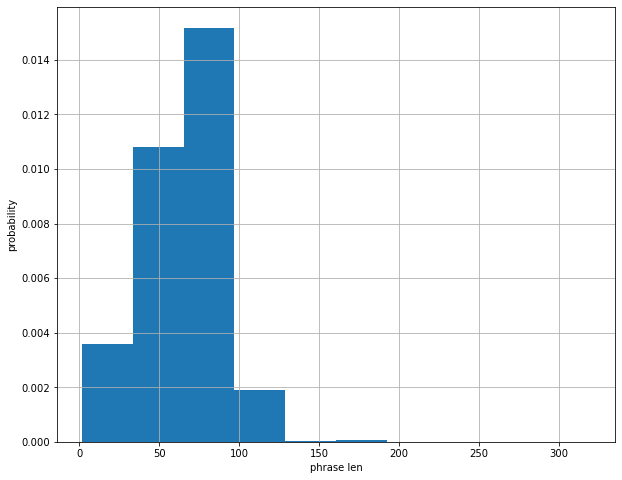

In [27]:

#dictionry for replace this word 
replace_list = {r"i'm": 'i am',
                r"'re": ' are',
                r"let’s": 'let us',
                r"'s":  ' is',
                r"'ve": ' have',
                r"can't": 'can not',
                r"cannot": 'can not',
                r"shan’t": 'shall not',
                r"n't": ' not',
                r"'d": ' would',
                r"'ll": ' will',
                r"'scuse": 'excuse',
                ',': ' ,',
                '.': ' .',
                '!': ' !',
                '?': ' ?',
                '\s+': ' '}

# Clean_text Function 
# Put data in lower case
def clean_text(text):
    text = text.lower() # to lower case 
    for s in replace_list: # for replace words
        text = text.replace(s, replace_list[s])
    text = ' '.join(text.split())
    return text

#####################################################
# Apply all in training and testing calling clean_text Function
X_train = df['summary'].apply(lambda p: clean_text(p))
X_test = df_test['summary'].apply(lambda p: clean_text(p))
y_train = df['price']
####
phrase_len = X_train.apply(lambda p: len(p.split(' '))) # get the length of words 
max_phrase_len = phrase_len.max() # calculate the maxium length 
print('max phrase len: {0}'.format(max_phrase_len))
# plot graph
plt.figure(figsize = (10, 8))
plt.hist(phrase_len, density = True)
plt.xlabel('phrase len')
plt.ylabel('probability')
plt.grid()
#
max_words = 8192 # Mamx number of words
tokenizer = Tokenizer( 
    num_words = max_words,
    filters = '"#$%&()*+-/:;<=>@[\]^_`{|}~'
) # tokenizer 
# Convert Sentence Into Word
tokenizer.fit_on_texts(X_train) #fiting on training 
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen = max_phrase_len)  #paddind seauence with max size word
########################################
tokenizer.fit_on_texts(X_test)#fiting on Test 
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen = max_phrase_len) #paddind seauence with max size word

####################### LSTM MODEL #####################
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim = max_words, output_dim = 256, input_length = max_phrase_len)) #embding correlation 
model_lstm.add(LSTM(32, dropout = 0.3, recurrent_dropout = 0.3))# Lstm
model_lstm.add(Dense(64, activation = 'relu'))# fully connected lAYER
model_lstm.add(Dense(128, activation = 'relu'))# fully connected lAYER
model_lstm.add(Dense(256, activation = 'relu'))# fully connected lAYER
model_lstm.add(Dropout(0.3)) # dropout
model_lstm.add(Dense(3, activation = 'softmax')) #output softmax
model_lstm.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

history = model_lstm.fit(
    X_train,
    y_train,
    validation_split = 0.1,
    epochs = 20,
    batch_size = 500
)# Fit model

############################## < For Kaggle Submission > ######################################################
# we can do prediction on training set
'''
y_predict = model_lstm.predict(X_test)
price_predicted = y_predict
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': X_test.id,
     'price': price_category_predicted}
).to_csv('Sample_submission.csv', index=False)
'''

## Conclusion For Trial 2

- I got The Accuracy is  93.0 % 
- Validation_Accuracy is 65 %
- This trial without early stopping that causes Overfitting Case so we can deal with is case by using Early Stopping and stop without continue to 20 epoches as example

By Using Lstm , We got these Results 
Lstm help in avoid vainshing gradient and good choice for Text classification 
********************************************************

## Trial 3 ( TEXT  Using GRU )

- Work on only Text as feature ( Input )
- 3 output ( price ) 0 or 1 or 2 
- Different Preprocessing on Text Using Translation Methods
- Using GRU layer..
- Dropout layer To deal with Overfitting.
- a gating mechanism in recurrent neural networks, introduced in 2014 by Kyunghyun Cho et al. The GRU is like a long short-term memory (LSTM) with a forget gate, but has fewer parameters than LSTM, as it lacks an output gate.


In [28]:
                                           ######### GRU MODEL ##########
model_GRU = Sequential()
model_GRU.add(Embedding(input_dim = max_words, output_dim = 256, input_length = max_phrase_len)) #embding correlation 
model_GRU.add(GRU(50, dropout = 0.3,)) # GRU
model_GRU.add(Dense(64, activation = 'relu'))# fully connected lAYER
model_GRU.add(Dense(128, activation = 'relu'))# fully connected lAYER
model_GRU.add(Dense(256, activation = 'relu'))# fully connected lAYER
model_GRU.add(Dropout(0.3)) # dropout
model_GRU.add(Dense(3, activation = 'softmax')) #output softmax
model_GRU.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)
monitor_val_acc = EarlyStopping(monitor = 'val_loss', patience = 5)
history = model_lstm.fit(
    X_train,
    y_train,
    validation_split = 0.1,
    epochs = 20,
    batch_size = 500,
      callbacks=[monitor_val_acc]
)# Fit model


Epoch 1/20
14/14 [==============================] - 116s 8s/step - loss: 0.1367 - accuracy: 0.9452 - val_loss: 1.9348 - val_accuracy: 0.6291
Epoch 2/20
14/14 [==============================] - 120s 9s/step - loss: 0.1322 - accuracy: 0.9441 - val_loss: 2.0662 - val_accuracy: 0.6409
Epoch 3/20
14/14 [==============================] - 122s 9s/step - loss: 0.1323 - accuracy: 0.9471 - val_loss: 1.9969 - val_accuracy: 0.6317
Epoch 4/20
14/14 [==============================] - 122s 9s/step - loss: 0.1274 - accuracy: 0.9465 - val_loss: 2.1202 - val_accuracy: 0.6461
Epoch 5/20
14/14 [==============================] - 122s 9s/step - loss: 0.1136 - accuracy: 0.9524 - val_loss: 2.2013 - val_accuracy: 0.6330
Epoch 6/20
14/14 [==============================] - 122s 9s/step - loss: 0.1141 - accuracy: 0.9506 - val_loss: 2.2390 - val_accuracy: 0.6383


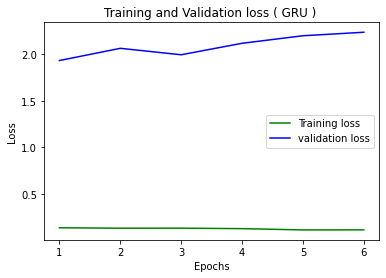

In [30]:
# The  graph Between loss_train and loss_val

loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,7)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss ( GRU ) ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# According to graph the loss of validation more than Training 

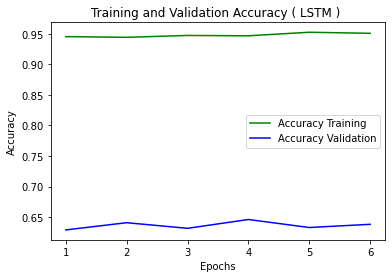

In [32]:
# The  graph Between accuracy and val_accuracy 
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,7)
plt.plot(epochs, loss_train, 'g', label='Accuracy Training')
plt.plot(epochs, loss_val, 'b', label='Accuracy Validation')
plt.title('Training and Validation Accuracy ( LSTM ) ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# According to graph the Accuracy of validation less than Training 

## Conclusion For Trial 3

- I got The Accuracy is  95.06  % 
- Validation_Accuracy is 60.1 %

By Using Gru , We got these Results 
Gru help in avoid vainshing gradient

-> After this epoches will not improve anything , so we use here Early Stopping

-> Here may be OverFitting Happend according to losses in validate and Train

-> may be OverFitting Happend here that can solve by increase data and features that will do in ( Trial 5 , 6 )

********************************************************

## Trial 4 ( TEXT Using GRU Layer and Bidirectional layer )

- Work on only Text as feature ( Input )
- 3 output ( price ) 0 or 1 or 2 
- Different Preprocessing on Text Using Translation Methods
- Using GRU layer..
- Using Bidirectional layer..
- Dropout layer.
- a gating mechanism in recurrent neural networks, introduced in 2014 by Kyunghyun Cho et al. The GRU is like a long short-term memory (LSTM) with a forget gate, but has fewer parameters than LSTM, as it lacks an output gate.
- Bidirectional recurrent neural networks (BRNN) connect two hidden layers of opposite directions to the same output. With this form of generative deep learning, the output layer can get information from past (backwards) and future (forward) states simultaneously
- we do this step to see if Bidirectional Layer will make diffrenece on accuracy or not

In [34]:
from keras import regularizers
                                         ######### GRU MODEL #########
model_GRU = Sequential()
model_GRU.add(Embedding(input_dim = max_words, output_dim = 256, input_length = max_phrase_len)) #embding correlation 
model_GRU.add(Bidirectional(GRU(50, dropout = 0.3,))) # GRU
model_GRU.add(Dense(64, activation = 'relu'))# fully connected lAYER
model_GRU.add(Dense(128, activation = 'relu'))# fully connected lAYER
model_GRU.add(Dense(256,kernel_regularizer=regularizers.l2(0.01) ,activation = 'relu'))# fully connected lAYER
model_GRU.add(Dropout(0.3)) # dropout
model_GRU.add(Dense(3, activation = 'softmax')) #output softmax
model_GRU.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)
monitor_val_acc = EarlyStopping(monitor = 'val_loss', patience = 5)
history2 = model_lstm.fit(
    X_train,
    y_train,
    validation_split = 0.1,
    epochs = 20,
    batch_size = 500,
    callbacks=[monitor_val_acc]
)# Fit model


Epoch 1/20
14/14 [==============================] - 152s 11s/step - loss: 0.1177 - accuracy: 0.9493 - val_loss: 2.1060 - val_accuracy: 0.6291
Epoch 2/20
14/14 [==============================] - 138s 10s/step - loss: 0.1114 - accuracy: 0.9518 - val_loss: 2.2103 - val_accuracy: 0.6356
Epoch 3/20
14/14 [==============================] - 134s 10s/step - loss: 0.1038 - accuracy: 0.9538 - val_loss: 2.5086 - val_accuracy: 0.6199
Epoch 4/20
14/14 [==============================] - 134s 10s/step - loss: 0.1171 - accuracy: 0.9480 - val_loss: 2.3678 - val_accuracy: 0.6409
Epoch 5/20
14/14 [==============================] - 150s 11s/step - loss: 0.1128 - accuracy: 0.9527 - val_loss: 2.4500 - val_accuracy: 0.6278
Epoch 6/20
14/14 [==============================] - 147s 10s/step - loss: 0.1134 - accuracy: 0.9521 - val_loss: 2.1995 - val_accuracy: 0.6199


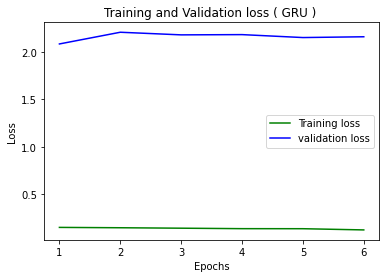

In [129]:
# The  graph Between loss_train and loss_val

loss_train = history2.history['loss']
loss_val = history2.history['val_loss']
epochs = range(1,7)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss ( GRU ) ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# According to graph the loss of validation more than Training 

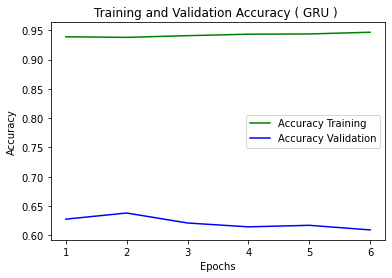

In [130]:
# The  graph Between accuracy and val_accuracy 
loss_train = history2.history['accuracy']
loss_val = history2.history['val_accuracy']
epochs = range(1,7)
plt.plot(epochs, loss_train, 'g', label='Accuracy Training')
plt.plot(epochs, loss_val, 'b', label='Accuracy Validation')
plt.title('Training and Validation Accuracy ( GRU ) ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# According to The graph the Accuracy of validation less than Training 

In [127]:
# Kaggle Submision
y_predict = model_GRU.predict(X_test)
price_predicted = y_predict
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': df_test.id,
     'price': price_category_predicted}
).to_csv('E:/Data_Mining/sample_submission.csv', index=False)

[[0.337494   0.33122158 0.33128446]
 [0.33420524 0.33397117 0.33182368]
 [0.33488068 0.33209005 0.3330292 ]
 ...
 [0.33432284 0.33309647 0.33258072]
 [0.33619058 0.3315277  0.33228174]
 [0.33634713 0.3323298  0.33132306]]
[0 0 0 ... 0 0 0]


## Conclusion For Trial 4

- I got The Accuracy is  94.65 % 
- Validation_Accuracy is 60.9 %
- The Accuracy on Kaggle is 60.624 %

By Using Gru , We got these Results 

-> may be OverFitting Happend here that can solve by increase data and features that will do in ( Trial 5 , 6 )

-> As Noticed that not make difference here 
********************************************************

## Trial 5 and 6 ( Text + Image ) 
## Multi-objective and Multi-modality

- Work on Text and Image as features ( Input )
- Different Preprocessing on word Using Tokienizer
- Using CNN on image and Text FullyConnected layer.
- Multi-objective learning. a multi-objective model ( predicting both price and type ) ----> Trial 5

- Multi-modality (text+image) ----> Trial 6

In [13]:
# preprocess text data

vocab_size = 40000
max_len = 100


# build vocabulary from training set
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(x_text)


def _preprocess(list_of_text):
    return pad_sequences(
        tokenizer.texts_to_sequences(list_of_text),
        maxlen=max_len,
        padding='post',
    )
    

# padding is done inside: 
x_text_id = _preprocess(x_text)

print(x_text_id.shape)

(7627, 100)


In [14]:
# we can use the tokenizer to convert IDs to words.
pprint(tokenizer.sequences_to_texts(x_text_id[:5]))

['spacious sunny and cozy modern apartment in the heart of montreal this 3 '
 'bedroom centrally located in the very popular plateau mont royal '
 'neighborhood in the middle of prince arthur pedestrian only street close to '
 'all amenities restaurants coffee house bars clubs shopping universities '
 'subway stations experience montreal like a real local resident be in the '
 'heart of the action grand prix week grill saint laurent festival mural 2019 '
 'and so much more',
 'located in one of the most vibrant and accessible locations of downtown '
 'montreal this one bedroom condo will not only impress you but leave you with '
 'one of the most memorable experiences it is walking distance of the popular '
 'sainte catherine street the bell center the old port lachine canal '
 'bonaventure metro and much much more',
 'logement coquet et douillet à 10 minutes du centre ville de montréal '
 'épicerie pharmacie saq restaurants et transports en communs à proximité deux '
 'chambres fermée

In [180]:
print('total words in the dictionary:', tokenizer.num_words)

total words in the dictionary: 40000


## Building a Learning model

In [1]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
# simple average of embedding. you can change it to anything else as needed
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
averaged=tf.reduce_mean(embedded, axis=1)


# image part 
# simple conv2d. you can change it to anything else as needed

cov = Conv2D(128, (16, 16), activation ='relu')(in_image)
pl = MaxPool2D((16, 16))(cov)


flattened = Flatten()(pl)


# fusion - combinig both
fused = tf.concat([ flattened,averaged], axis=-1)

# multi-task learning (each is a multi-class classification)

# one dense layer for each task

fused = Dense(1024, activation='relu')(fused)




p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={ # input summary and image
       'summary': in_text,
        'image': in_image
    },
    outputs={ # output type and price
        'type': p_type,
        'price': p_price,
    },
)


# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

NameError: name 'keras' is not defined

## Model Training

Based on the training/validation performance, you can adjust the epochs to be trained. Early stoping is watching the validation loss on price prediction (assuming that it is the main task we would like to perform)

In [185]:
history = model.fit(
    x={
        'summary': x_text_id,
        'image': x_image
    },
    y={
        'type': y_type,
        'price': y_price,
    },
    epochs=20,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5, )
    ],
    verbose=1
)

Epoch 1/20
382/382 [==============================] - 92s 237ms/step - loss: 4.7972 - price_loss: 5.1968 - type_loss: 3.8648 - price_sparse_categorical_accuracy: 0.6122 - type_sparse_categorical_accuracy: 0.7436 - val_loss: 0.8397 - val_price_loss: 0.7955 - val_type_loss: 0.9426 - val_price_sparse_categorical_accuracy: 0.6252 - val_type_sparse_categorical_accuracy: 0.7647
Epoch 2/20
382/382 [==============================] - 102s 268ms/step - loss: 0.8123 - price_loss: 0.7563 - type_loss: 0.9430 - price_sparse_categorical_accuracy: 0.6476 - type_sparse_categorical_accuracy: 0.7536 - val_loss: 0.7706 - val_price_loss: 0.7127 - val_type_loss: 0.9057 - val_price_sparse_categorical_accuracy: 0.6907 - val_type_sparse_categorical_accuracy: 0.7647
Epoch 3/20
382/382 [==============================] - 86s 225ms/step - loss: 0.7062 - price_loss: 0.6349 - type_loss: 0.8727 - price_sparse_categorical_accuracy: 0.7210 - type_sparse_categorical_accuracy: 0.7543 - val_loss: 0.7502 - val_price_loss: 

## Predition

We can use the model to predict the testing samples.

In [57]:
x_test_text = _preprocess(df_test.summary.astype('str'))
# we can do prediction on training set
y_predict = model.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
type_predicted = y_predict['type']
print(type_predicted)

# categories
type_category_predicted = np.argmax(type_predicted, axis=1)
print(type_category_predicted)


# probabilities
price_predicted = y_predict['price']
#print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
#print(price_category_predicted)

#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': df_test.id,
     'price': price_category_predicted}
).to_csv('E:/Data_Mining/sample_submission.csv', index=False)

[[1.53971254e-03 2.30374545e-01 2.62675174e-02 ... 1.71208510e-03
  8.76827016e-02 5.31611545e-03]
 [7.22443583e-05 8.29501510e-01 1.06278099e-02 ... 2.81422312e-04
  1.97595954e-02 9.68265289e-04]
 [1.25150906e-03 7.35273957e-02 3.37278992e-02 ... 1.40750397e-03
  1.15140505e-01 4.61195223e-03]
 ...
 [4.37500741e-04 6.86200857e-01 1.37484074e-02 ... 6.96423871e-04
  2.99715344e-02 2.03543715e-03]
 [4.92511084e-04 4.43377376e-01 3.34597863e-02 ... 1.36653217e-03
  7.40405992e-02 4.85900091e-03]
 [5.98593542e-05 7.58526981e-01 3.64225567e-03 ... 2.29312747e-04
  1.54577903e-02 6.60016842e-04]]
[17  1 17 ...  1  1  1]


## Conclusion For Trial 5 ,6 

- Accuracy on Kaggle is 67 %

- Price_Accuracy: 89.53 % 

- Type_Accuracy: 84.74 %

- Val_price_Accuracy: 64.68 % 

- Val_type_Accuracy: 77.65 %

This is the best trial i got by combine Text and Image and predict the ( Price and Type )

-> Here the OverFitting Disappeared by using more features

--------------------------------------------------------------------------------------

## Trial 7 ( Text + Image )
## Multi-objective and Multi-modality

- Work on Text and Image as features ( Input )
- Different Preprocessing on word Using Tokienizer
- Using CNN on image and Text using LSTM then FullyConnected layer.
- Multi-objective learning. a multi-objective model ( predicting both price and type ) 
- Using dropout
- Multi-modality (text+image)

In [15]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
# simple average of embedding. you can change it to anything else as needed
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
embedded=LSTM(32, dropout = 0.3, recurrent_dropout = 0.3)(embedded) # Using LSTM Layer for Text

# image part 
# simple conv2d. you can change it to anything else as needed

cov = Conv2D(128, (16, 16), activation ='relu')(in_image)
pl = MaxPool2D((16, 16))(cov)


flattened = Flatten()(pl)


# fusion - combinig both
fused = tf.concat([ flattened,embedded], axis=-1)

# multi-task learning (each is a multi-class classification)

# one dense layer for each task

fused = Dense(1024, activation='relu')(fused)




p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={ # input summary and image
       'summary': in_text,
        'image': in_image
    },
    outputs={ # output type and price
        'type': p_type,
        'price': p_price,
    },
)


# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 49, 49, 128)  65664       ['input_2[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 3, 3, 128)    0           ['conv2d[0][0]']                 
                                                                                              

In [16]:
history = model.fit(
    x={
        'summary': x_text_id,
        'image': x_image
    },
    y={
        'type': y_type,
        'price': y_price,
    },
    epochs=20,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5, )
    ],
    verbose=1
)

Epoch 1/20
382/382 [==============================] - 148s 375ms/step - loss: 3.7056 - price_loss: 4.6995 - type_loss: 2.7116 - price_sparse_categorical_accuracy: 0.6135 - type_sparse_categorical_accuracy: 0.7364 - val_loss: 0.9040 - val_price_loss: 0.8312 - val_type_loss: 0.9768 - val_price_sparse_categorical_accuracy: 0.6252 - val_type_sparse_categorical_accuracy: 0.7647
Epoch 2/20
382/382 [==============================] - 131s 341ms/step - loss: 0.9312 - price_loss: 0.8394 - type_loss: 1.0231 - price_sparse_categorical_accuracy: 0.6201 - type_sparse_categorical_accuracy: 0.7536 - val_loss: 0.9074 - val_price_loss: 0.8387 - val_type_loss: 0.9762 - val_price_sparse_categorical_accuracy: 0.6252 - val_type_sparse_categorical_accuracy: 0.7647
Epoch 3/20
382/382 [==============================] - 125s 328ms/step - loss: 0.9230 - price_loss: 0.8381 - type_loss: 1.0079 - price_sparse_categorical_accuracy: 0.6189 - type_sparse_categorical_accuracy: 0.7530 - val_loss: 0.9034 - val_price_loss

## Conclusion For Trial 7 


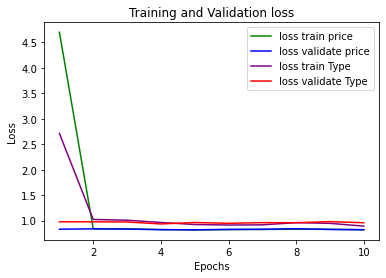

In [22]:
# The  graph Between loss_train and loss_val

loss_train_price = history.history['price_loss'] # price loss on training data
loss_validate_price = history.history['val_price_loss']# price loss on validate data

#
loss_train_type = history.history['type_loss'] # type loss on training data
loss_validate_type = history.history['val_type_loss'] # type loss on validate data
#
epochs = range(1,11)
plt.plot(epochs, loss_train_price, 'g', label='loss train price')
plt.plot(epochs, loss_validate_price, 'b', label='loss validate price')
#
plt.plot(epochs, loss_train_type, 'purple', label='loss train Type')
plt.plot(epochs, loss_validate_type, 'r', label='loss validate Type')

plt.title('Training and Validation losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# According to graph the loss of validation more than Training 

- Accuracy on Kaggle is 60 %

- Price Accuracy: 62.02 % 

- Type Accuracy: 76.48 %

- Val Price Accuracy: 62.32 % 

- Val Type Accuracy: 76.28 %
 
I got these results as using lstm as extra step From the previous one 
I got less accuracy compared with the previouse one but no big deal or problem

LSTM models can capture long-term dependencies between word sequences; hence are better used for text classification.

-> Here the OverFitting Disappeared by Using More Features

# ✔️ Answer the questions below (briefly):

# 🌈Is fully-connected model a good one for sequential data? Why? How about for image data? Is it good? Why?

-> I think is not the best choice for Sequential Data

-> The two main deep learning architectures for text classification are Convolutional Neural Networks (CNN) and Recurrent Neural Networks (RNN) . If the order of works matters then RNN and LSTM should be best.

-> sequential data depends on previous and next events so the best is rnn / lstm /gru
 
-------------------------------------

# Fully-connected model For Image 

- Isn't good for feature extraction .

1 - Expanding The image into vector will lose spatial information .

2 - Variant by position .

3- Large Number of parameters will quickly lead to network Overfitting .

The best for feature extaction is CNN beacause interact with image as Tensor .

# 🌈What is gradient vanishing and gradient explosion, and how GRU/LSTM tries to mitigate this problem?

-> Vanishing Gradient : problem is encountered when training artificial neural networks with gradient-based learning methods and backpropagation. In such methods, during each iteration of training each of the neural network's weights receives an update proportional to the partial derivative of the error function with respect to the current weight. The problem is that in some cases, the gradient will be vanishingly small, effectively preventing the weight from changing its value. In the worst case, this may completely stop the neural network from further training. As one example of the problem cause, traditional activation functions such as the hyperbolic tangent function have gradients in the range (0,1], and backpropagation computes gradients by the chain rule. This has the effect of multiplying n of these small numbers to compute gradients of the early layers in an n-layer network, meaning that the gradient (error signal) decreases exponentially with n while the early layers train very slowly.

- The model weights may become 0 during training.
- The model learns very slowly and perhaps the training stagnates at a very early stage just after a few iterations
- The parameters of the higher layers change significantly whereas the parameters of lower layers would not change much (or not at all).

------------------------------------------------------


-> Exploding Gradient : occurs when the derivatives or slope will get larger and larger as we go backward with every layer during backpropagation. This situation is the exact opposite of the vanishing gradients. This problem happens because of weights, not because of the activation function

- There is an exponential growth in the model parameters.
- The model weights may become NaN during training.
- The model experiences  avalanche learning
-------------------------------------------------------

# How GRU/LSTM tries to mitigate this problem?

* LSTMs solve the problem using a unique additive gradient structure that includes direct access to the forget gate's activations, enabling the network to encourage desired behaviour from the error gradient using frequent gates update on every time step of the learning proces .

----------------------------------------------------------

* To solve the vanishing gradient problem of a standard RNN, GRU uses, so-called, update gate and reset gate. Basically, these are two vectors which decide what information should be passed to the output.

----------------------------------------------

* LSTM/GRU cells solve this problem by turning multiplication into addition. You have a cell state, and instead of multiplying you either add or subtract from it


# 🌈What is multi-objective/multi-task learning? What is multi-modality learning? How do you use them in this assignment?


-> Multi-task Learning (MTL) is a collection of techniques intended to learn multiple tasks simultaneously instead of learning them separately.

-> multiple tasks are solved jointly, sharing inductive bias between them. Multi-task learning is inherently a multi-objective problem because different tasks may conflict, necessitating a trade-off.

-----------------------------------

-> Multimodal learning suggests that when a number of our senses – visual, auditory, kinaesthetic – are being engaged during learning, we understand and remember more. By combining these modes, learners experience learning in a variety of ways to create a diverse learning style.

-------------------------------------------

-> I think  Multimodal learning which deals with different kinds of data e.g. text, image, audio..etc and tries to learn a joint representation of the data.

Multitask learning aims to learn multiple tasks at the same time. Those tasks could be for data of the same kind e.g. translation, question answering, summarization..etc

--------------------------------------------------------

# In the Assignment

1 - Using Multimodal Summary of type ( Text ) and Image .

2 - Apply on each one of them different teqniue on text and image 

3 - Predict more than one feature  


# 🌈What is the difference among xgboost, lightgbm and catboost



# 1 - lightGBM

offers gradient-based one-side sampling (GOSS) that selects the split using all the instances with large gradients (i.e., large error) and a random sample of instances with small gradients. In order to keep the same data distribution when computing the information gain, GOSS introduces a constant multiplier for the data instances with small gradients. Thus, GOSS achieves a good balance between increasing speed by reducing the number of data instances and keeping the accuracy for learned decision trees. This method is not the default method for LightGBM, so it should be selected explicitly.

---------------------------------


# 2 - Catboost 

offers a new technique called Minimal Variance Sampling (MVS), which is a weighted sampling version of Stochastic Gradient Boosting. In this technique, the weighted sampling happens in the tree-level and not in the split-level. The observations for each boosting tree are sampled in a way that maximizes the accuracy of split scoring.

---------------------------------

# 3- XGboost 

is not using any weighted sampling techniques, which makes its splitting process slower compared to GOSS and MVS
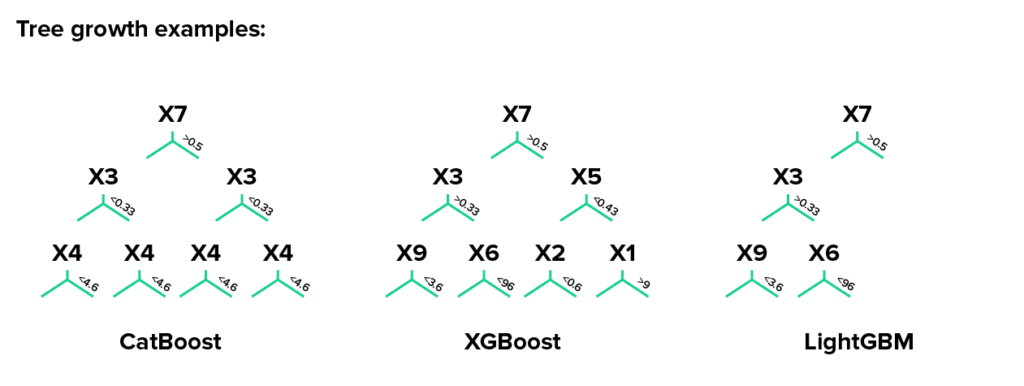
